In [ ]:

import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import torchvision.transforms as transforms
import warnings
warnings.filterwarnings('ignore')

In [ ]:

DATA_ROOT = Path(r"C:\Users\sudha\Downloads\ISIC")
TRAIN_IMG_PATH = DATA_ROOT / "ISIC2018_Task3_Training_Input"
TRAIN_CSV_PATH = DATA_ROOT / "ISIC2018_Task3_Training_GroundTruth" / "ISIC2018_Task3_Training_GroundTruth.csv"
df_exp = pd.read_csv(TRAIN_CSV_PATH)
df_exp['label'] = df_exp.iloc[:, 1:].idxmax(axis=1)
CLASS_NAMES = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
print(f"Total training images for exploration: {len(df_exp)}")

Total training images for exploration: 10015


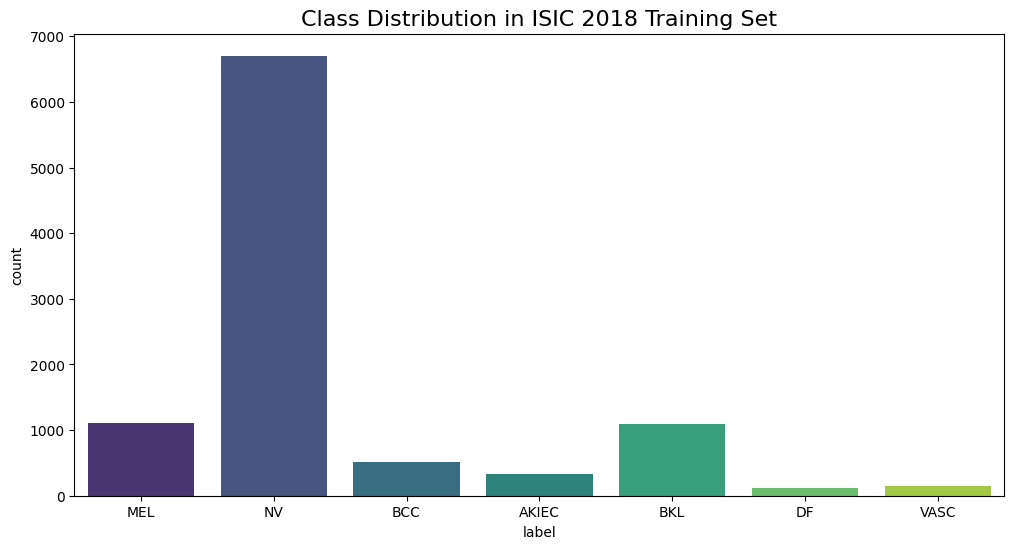

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_exp, x='label', order=CLASS_NAMES, palette='viridis')
plt.title('Class Distribution in ISIC 2018 Training Set', fontsize=16)
plt.show()

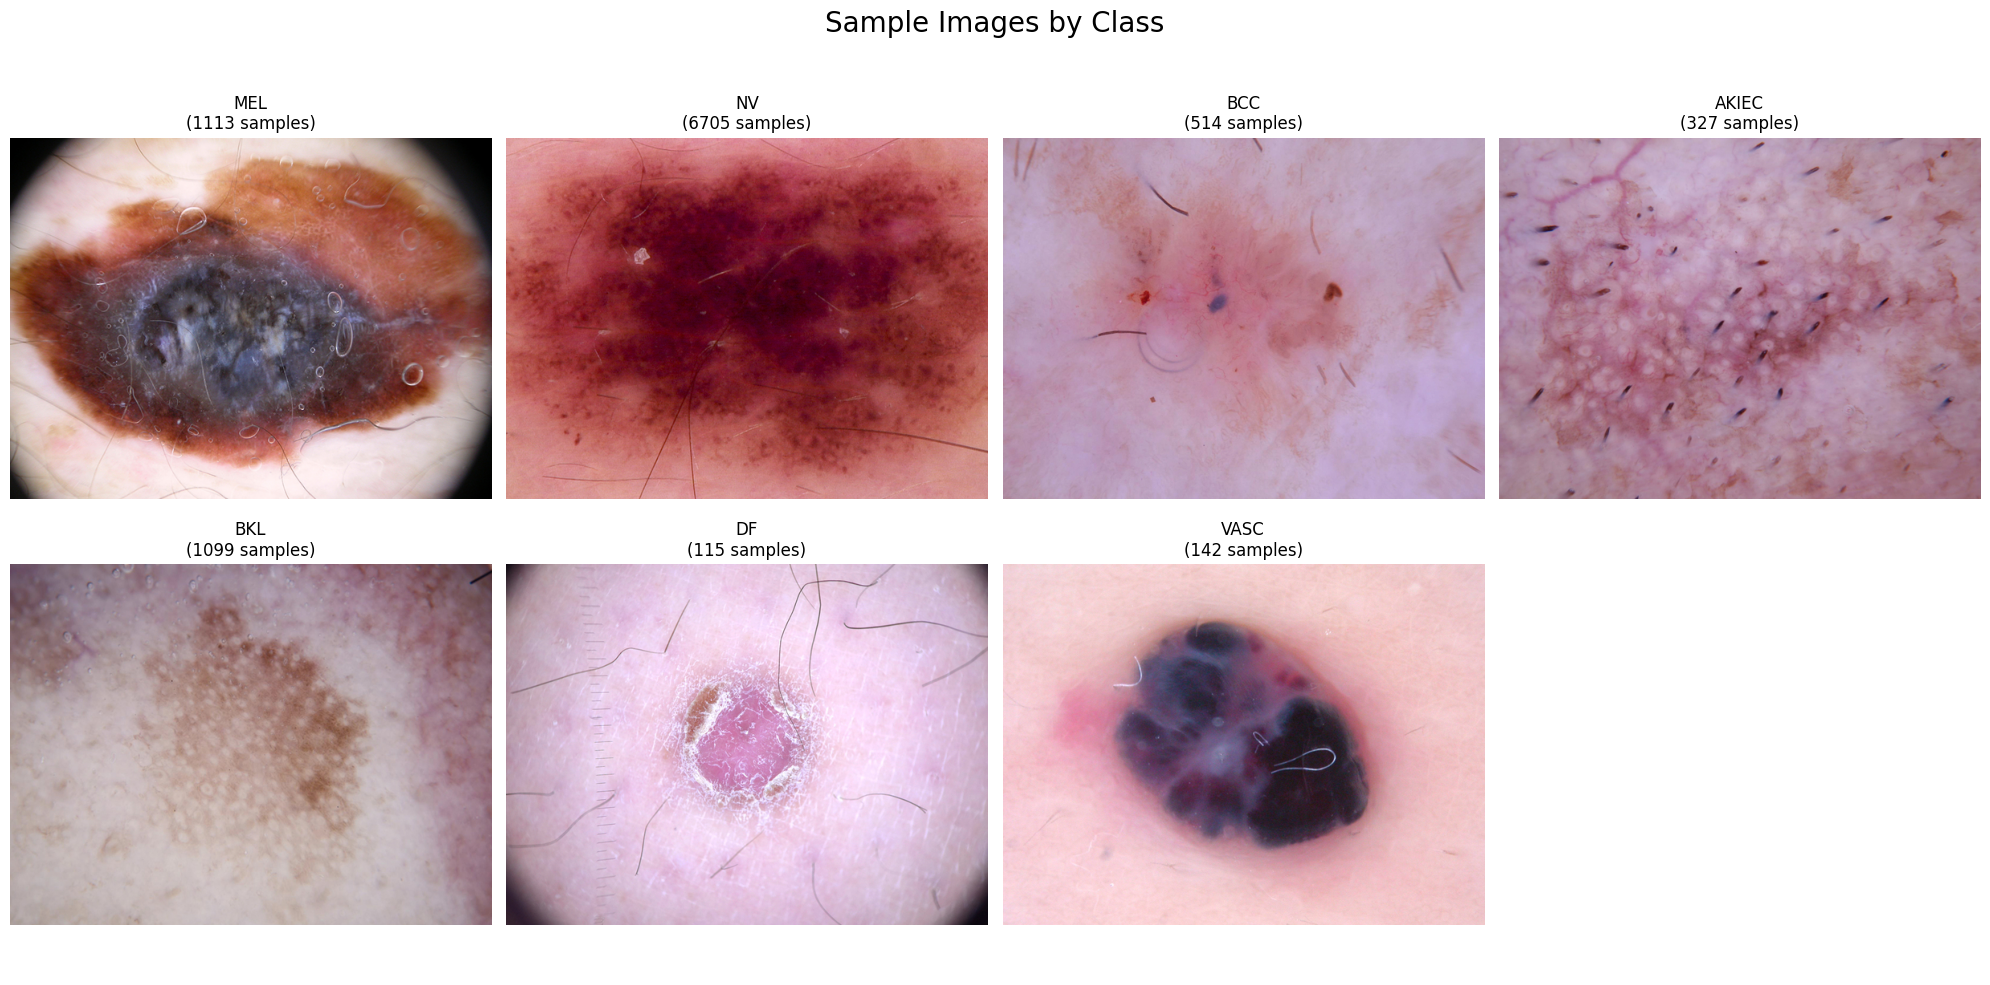

In [ ]:

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, class_name in enumerate(CLASS_NAMES):
    sample_row = df_exp[df_exp['label'] == class_name].sample(1, random_state=42).iloc[0]
    img = Image.open(TRAIN_IMG_PATH / f"{sample_row['image']}.jpg")
    axes[i].imshow(img)
    axes[i].set_title(f"{class_name}\n({df_exp['label'].value_counts()[class_name]} samples)")
    axes[i].axis('off')
if len(CLASS_NAMES) < len(axes): axes[-1].axis('off')
plt.suptitle('Sample Images by Class', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Analyzing image dimensions...


100%|██████████| 10015/10015 [01:43<00:00, 96.37it/s]


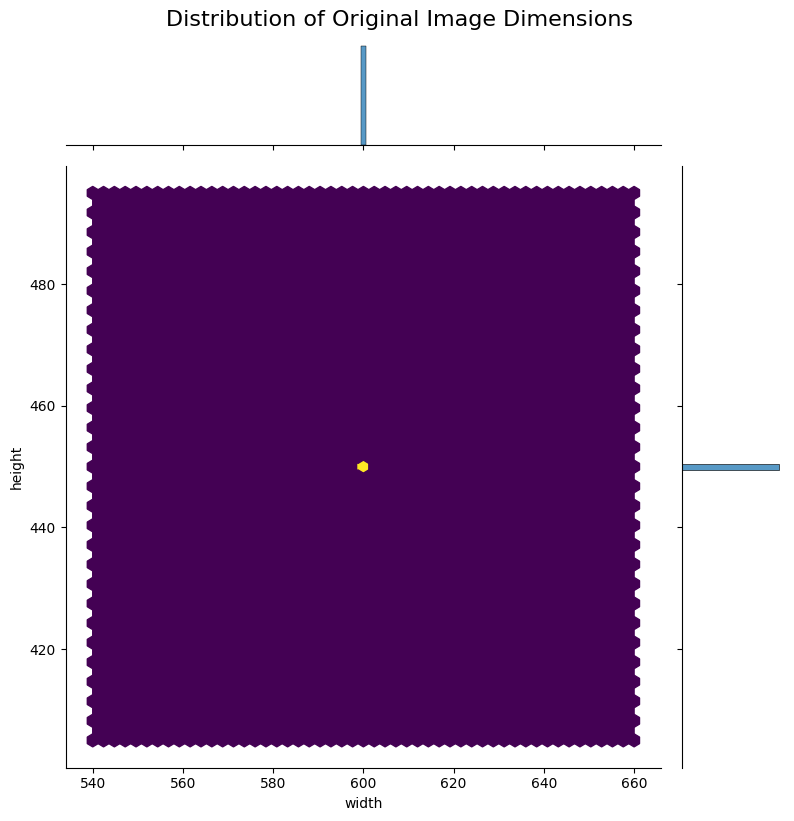

In [ ]:

print("\nAnalyzing image dimensions...")
dims = [Image.open(TRAIN_IMG_PATH / f"{img_name}.jpg").size for img_name in tqdm(df_exp['image'])]
df_dims = pd.DataFrame(dims, columns=['width', 'height'])
g = sns.jointplot(data=df_dims, x='width', y='height', kind='hex', cmap='viridis', height=8)
g.fig.suptitle('Distribution of Original Image Dimensions', y=1.02, fontsize=16)
plt.show()


Showcasing data augmentations...


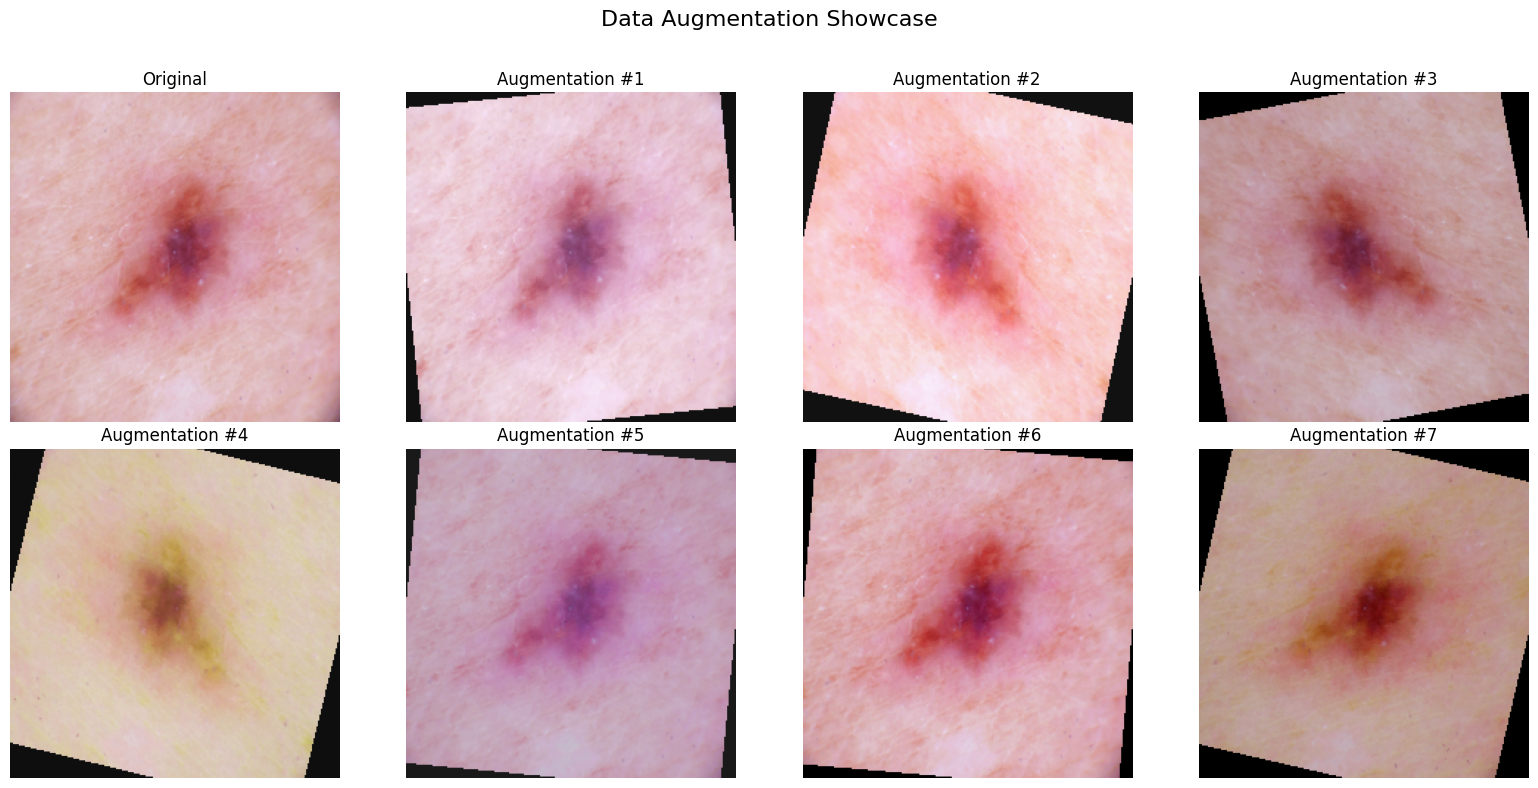

In [ ]:

print("\nShowcasing data augmentations...")
train_transform_showcase = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])
original_img = Image.open(TRAIN_IMG_PATH / f"{random.choice(df_exp['image'])}.jpg")
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes[0, 0].imshow(original_img.resize((224, 224))); axes[0, 0].set_title('Original'); axes[0, 0].axis('off')
for i in range(1, 8):
    ax = axes.flatten()[i]
    aug_img_tensor = transforms.ToTensor()(train_transform_showcase(original_img))
    ax.imshow(aug_img_tensor.permute(1, 2, 0))
    ax.set_title(f'Augmentation #{i}'); ax.axis('off')
plt.suptitle('Data Augmentation Showcase', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()